<a href="https://colab.research.google.com/github/Karagiannis-Giorg/A-new-perspective-to-Smart-Fridges/blob/main/Level_1/Val_%26_Pre_level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

ROOT_DIR = '/content/gdrive/My Drive/Georgios_Karagiannis/Code'

!pip install ultralytics==8.3.40

Mounted at /content/gdrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jrkIR8tZdg5Y8uIaKmwZ")
project = rf.workspace("smart-fridge-jvm9v").project("level1_images")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to level1_images-2 in yolov11:: 100%|██████████| 1826/1826 [00:00<00:00, 5319.74it/s]


In [ ]:
import os
import cv2  # Import OpenCV for image processing
from ultralytics import YOLO

# Load a model
model = YOLO(os.path.join(ROOT_DIR, "Level1_train/detect/train/weights/best.pt"))


# Validate the model
metrics = model.val(data="/content/level1_images-2/data.yaml")
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 73.6MB/s]
val: Scanning /content/level1_images-2/valid/labels... 151 images, 0 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<00:00, 1305.54it/s]

val: New cache created: /content/level1_images-2/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


                   all        151        361       0.97      0.988      0.991      0.907
                 Apple         50         53      0.937          1       0.99      0.929
                Banana         27         27      0.951          1      0.995      0.844
                  Lime         23         23      0.983          1      0.995      0.952
                Orange         31         31      0.976          1      0.995      0.965
                 Peach         41         41      0.927      0.951      0.969      0.937
                  Pear         37         37       0.99          1      0.995      0.795
           Pomegranate         25         25      0.999       0.96      0.993      0.904
                Tomato         58        124          1      0.989      0.995      0.927
Speed: 2.3ms preprocess, 7.8ms inference, 0.0ms loss, 8.9ms postprocess per image
Results saved to runs/detect/val


array([    0.92891,     0.84361,     0.95202,     0.96526,       0.937,     0.79532,     0.90367,     0.92655])

In [ ]:
print("Average precision:", metrics.box.ap)
print("Average precision at IoU=0.50:", metrics.box.ap50)
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)
print("F1 score:", metrics.box.f1)

Average precision: [    0.92891     0.84361     0.95202     0.96526       0.937     0.79532     0.90367     0.92655]
Average precision at IoU=0.50: [    0.98974       0.995       0.995       0.995     0.96927       0.995     0.99346       0.995]
Precision: [    0.93723     0.95081      0.9833     0.97554     0.92701     0.98963     0.99933           1]
Recall: [          1           1           1           1     0.95122           1        0.96     0.98882]
F1 score: [     0.9676     0.97479     0.99158     0.98762     0.93896     0.99479     0.97927     0.99438]


In [ ]:
import shutil

# Define the source and destination paths
src = '/content/runs/detect/val'
dst = '/content/gdrive/My Drive/Georgios_Karagiannis/Code/Level1_val'

# Copy the folder
shutil.copytree(src, dst)

'/content/gdrive/My Drive/Georgios_Karagiannis/Code/Level1_val'


0: 384x640 1 Apple, 3 Bananas, 1 Peach, 1 Pomegranate, 2 Tomatos, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


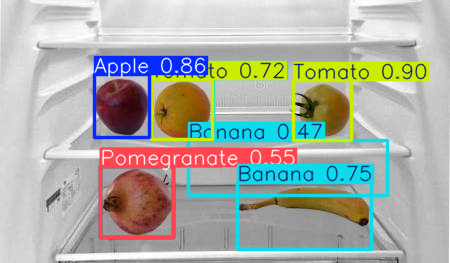

In [ ]:
import os
import cv2  # Import OpenCV for image processing
from ultralytics import YOLO

# Load a model
model = YOLO(os.path.join(ROOT_DIR, "Level1_train/detect/train/weights/best.pt"))


image_paths = ["/content/gdrive/MyDrive/Georgios_Karagiannis/Code/test.jpg"]
# Process each image
processed_images = []
for image_path in image_paths:
    img = cv2.imread(image_path)  # Read the image using OpenCV
    processed_images.append(img)

# Run batched inference on the processed images
results = model(processed_images)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen